In [1]:
import numpy as np
import pandas as pd
import os
from functools import partial
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

/Applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from matplotlib.ticker import LogFormatter 
from matplotlib.colors import LogNorm
from matplotlib import gridspec

In [3]:
from sklearn.metrics import  (auc, confusion_matrix, f1_score, accuracy_score, average_precision_score,
                              precision_score, roc_curve, precision_recall_curve, recall_score)

/Applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
tag = 'e5ce2d69b035975cb5336cec0da9a32a'
dfpred = pd.read_table(f'../tables/all_predictions_with_images-{tag}.tab')

In [5]:
len(dfpred)

772423

In [6]:
pred_cols = dfpred.columns.map(lambda x: x.startswith('score')).tolist()

In [7]:
(~dfpred.view.isnull()).sum()

4189

In [8]:
eps = 0
dfpred["score_ViewModifier"] = 1-( eps + (1-2*eps)*dfpred.ViewModifier.isnull().astype(float))

In [9]:
# dfpred

In [10]:
dfpred["score_ViewModifier"].map(str).value_counts()

0.0    692365
1.0     80058
Name: score_ViewModifier, dtype: int64

In [11]:
dfpred.head()

,id,score_gbm,score_xgb,score_rpart,score_gbmt,ViewModifier,set,label,view,score_image,...,score_image*glmnet,score_image*gbmt,score_max_image_wire,score_max_image_wire_max,score_max_image_wire+gbmt,score_max_image_wire_max+gbmt,score_max_wire_image+gbmt,score_max_wire_max_image+gbmt,score_max(image;wire_max;gbmt),score_ViewModifier
0,1000047423_1.2.840.113654.2.70.1.2089724714216...,0.001434,0.002226,0.006882,0.045568,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.022784,0.022784,0.0,0.0,0.045568,0.0
1,1000047423_1.2.840.113654.2.70.1.2089724714216...,0.001434,0.002226,0.006882,0.045573,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.022786,0.022786,0.0,0.0,0.045573,0.0
2,1000047423_1.2.840.113654.2.70.1.2089724714216...,0.001434,0.001841,0.006882,0.045569,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.022784,0.022784,0.0,0.0,0.045569,0.0
3,1000047423_1.2.840.113654.2.70.1.2089724714216...,0.001434,0.001841,0.006882,0.045568,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.022784,0.022784,0.0,0.0,0.045568,0.0
4,1000047594_1.2.840.113654.2.70.1.1921731705635...,0.001402,0.003848,0.006882,0.045498,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.022749,0.022749,0.0,0.0,0.045498,0.0


In [12]:
dfpredthr = dfpred.iloc[:,pred_cols] > 0.5
dfpredthr["label"] = dfpred["label"] == "special"
dfpredthr["set"] = dfpred["set"]
dfpredthr["view"] = dfpred["view"]

In [13]:
def bool_to_sn(x):
    return {True:"special", False:"normal"}[x]

In [14]:
# dfpred['score_image_glmnet']
# pd.crosstab(dfpred['label'][mask], 
# vv[mask].map(lambda x: {True:"special", False:"normal"}[x])
#                         ))

In [15]:
for cc,vv in dfpredthr.items():
    mask = dfpred['set'] == 'train'
    if cc in ("label", "view", "set"):
        continue
    print('='*30)
    print(pd.crosstab(dfpred['label'][mask], vv[mask].map(lambda x: {True:"special", False:"normal"}[x])))

score_gbm  normal  special
label                     
normal       2309        1
special        42      396
score_xgb  normal  special
label                     
normal       2309        1
special        47      391
score_rpart  normal  special
label                       
normal         2309        1
special          49      389
score_gbmt  normal  special
label                      
normal        2309        1
special         43      395
score_image  normal  special
label                       
normal         2310        0
special           5      433
score_image_max  normal  special
label                           
normal             2310        0
special               3      435
score_glmnet  normal  special
label                        
normal          2310        0
special           43      395
score_wire  normal  special
label                      
normal        2310        0
special        401       37
score_wire_max  normal  special
label                          
normal      

In [16]:
# dfpredthr

In [17]:
dfpred[((dfpredthr['label'] != dfpredthr['score_gbm']) & 
       (~dfpredthr['label']))][mask]

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,id,score_gbm,score_xgb,score_rpart,score_gbmt,ViewModifier,set,label,view,score_image,...,score_image*glmnet,score_image*gbmt,score_max_image_wire,score_max_image_wire_max,score_max_image_wire+gbmt,score_max_image_wire_max+gbmt,score_max_wire_image+gbmt,score_max_wire_max_image+gbmt,score_max(image;wire_max;gbmt),score_ViewModifier
223816,1889161318_1.2.840.113654.2.70.1.1381752400528...,0.585668,0.873359,0.956522,0.806164,spot compression,train,normal,N,0.000013,...,0.002066,0.003259,0.000013,0.000013,0.403089,0.403089,0.403089,0.403089,0.806164,1.0


In [18]:
# dfpred[((dfpredthr['label'] != dfpredthr['score_gbm']) & 
#        (dfpredthr['label']))][mask]

In [19]:
print('='*30)
print("TEST")
for cc,vv in dfpredthr.items():
    if cc in ("label", "view", "set"):
        continue
    mask = dfpred['set'] == 'test'
    print('='*30)
    print(pd.crosstab(dfpred['label'][mask], vv[mask].map(lambda x: {True:"special", False:"normal"}[x])))

TEST
score_gbm  normal  special
label                     
normal        612        0
special        13      101
score_xgb  normal  special
label                     
normal        612        0
special        13      101
score_rpart  normal  special
label                       
normal          612        0
special          13      101
score_gbmt  normal  special
label                      
normal         612        0
special         13      101
score_image  normal  special
label                       
normal          610        2
special           7      107
score_image_max  normal  special
label                           
normal              609        3
special               7      107
score_glmnet  normal  special
label                        
normal           612        0
special           13      101
score_wire  normal  special
label                      
normal         612        0
special        104       10
score_wire_max  normal  special
label                          
normal 

In [20]:
print('='*30)
print("VAL")
for cc,vv in dfpredthr.items():
    if cc in ("label", "view", "set"):
        continue
    mask = dfpred['set'] == 'val'
    print('='*30)
    print(pd.crosstab(dfpred['label'][mask], vv[mask].map(lambda x: {True:"special", False:"normal"}[x])))

VAL
score_gbm  normal  special
label                     
normal        604        0
special        13       98
score_xgb  normal  special
label                     
normal        604        0
special        14       97
score_rpart  normal  special
label                       
normal          604        0
special          14       97
score_gbmt  normal  special
label                      
normal         604        0
special         13       98
score_image  normal  special
label                       
normal          603        1
special          11      100
score_image_max  normal  special
label                           
normal              603        1
special              11      100
score_glmnet  normal  special
label                        
normal           604        0
special           13       98
score_wire  normal  special
label                      
normal         603        1
special        103        8
score_wire_max  normal  special
label                          
normal  

In [21]:
pd.crosstab(dfpredthr['score_image'][mask].map(bool_to_sn),
            dfpredthr['score_xgb'][mask].map(bool_to_sn))

score_xgb,normal,special
score_image,,
normal,613,1
special,5,96


In [22]:
pd.crosstab(dfpredthr['score_image'][mask].map(bool_to_sn),
            dfpredthr['score_glmnet'][mask].map(bool_to_sn))

score_glmnet,normal,special
score_image,,
normal,613,1
special,4,97


In [23]:
THR = 0.5
# dfpred[(dfpred['score_image']>THR) != (dfpred['label']=="special")][dfpred["set"] == "test"]

In [24]:
for cc,vv in dfpredthr.items():
    if cc in ('label', "set", 'view'):
        continue
    mask = dfpred['set'] == 'train'
    print('='*30)
    print(pd.crosstab(dfpred['label'][mask], vv[mask].map(lambda x: {True:"special", False:"normal"}[x])))

score_gbm  normal  special
label                     
normal       2309        1
special        42      396
score_xgb  normal  special
label                     
normal       2309        1
special        47      391
score_rpart  normal  special
label                       
normal         2309        1
special          49      389
score_gbmt  normal  special
label                      
normal        2309        1
special         43      395
score_image  normal  special
label                       
normal         2310        0
special           5      433
score_image_max  normal  special
label                           
normal             2310        0
special               3      435
score_glmnet  normal  special
label                        
normal          2310        0
special           43      395
score_wire  normal  special
label                      
normal        2310        0
special        401       37
score_wire_max  normal  special
label                          
normal      

In [25]:
def colordictmap(x):
    if x is np.nan:
        return [0.5]*3
    if x=='special':
        return 'orange'
    elif x=='normal':
        return 'b'
    else:
        return 'k'

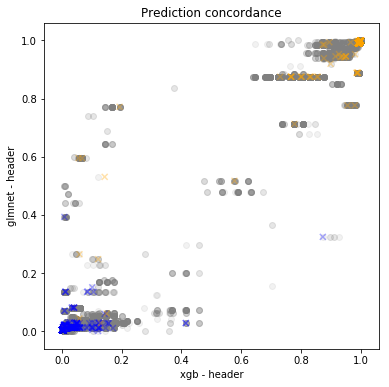

In [26]:
fig, ax = plt.subplots(1, figsize=(6,6))
ax.scatter(dfpred['score_xgb'][~mask],
            dfpred['score_glmnet'][~mask],
            c=[0.5]*3,
           alpha = 0.1,
          )

ax.scatter(dfpred['score_xgb'][mask],
            dfpred['score_glmnet'][mask],
            c=dfpred['label'][mask].map(lambda x: 'orange' if x=='special' else 'b'),
           alpha = 0.333,
           marker='x'
          )
ax.set_title("Prediction concordance")
ax.set_xlabel('xgb - header')
ax.set_ylabel('glmnet - header')
pass

In [28]:
pd.crosstab(dfpred["label"], dfpred["digital"])

digital,False,True
label,,
normal,2351,1175
special,302,361


In [29]:
pd.crosstab(dfpred["view"], dfpred["set"])

set,test,train,val
view,,,
M,96,380,96
N,612,2310,604
T,4,17,4
W,11,37,9
X,3,4,2


In [30]:
dfpred["view"].value_counts()

N    3526
M     572
W      57
T      25
X       9
Name: view, dtype: int64

In [ ]:
# fig, ax = plt.subplots(1, figsize=(6,6))
# ax.scatter(dfpred['score_image'][~mask],
#             dfpred['score_xgb'][~mask],
#             c=[0.5]*3,
#            alpha = 0.1,
#           )

# ax.scatter(dfpred['score_image'][mask],
#             dfpred['score_xgb'][mask],
#             c=dfpred['label'][mask].map(lambda x: 'orange' if x=='special' else 'b'),
#            alpha = 0.333,
#            marker='x',
#           )
# ax.set_title("Prediction concordance")
# ax.set_xlabel('image')
# ax.set_ylabel('header')
# pass

Text(0,0.5,'header')

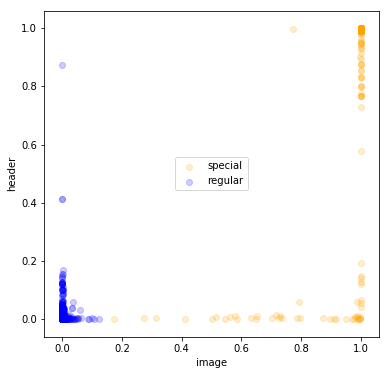

In [31]:
fig, ax = plt.subplots(1, figsize=(6,6))
label_mask = dfpred['label'][mask].map(lambda x: x=='special')

ax.scatter(dfpred['score_image'][mask][label_mask],
           dfpred['score_xgb'][mask][label_mask],
           c='orange',
           label='special',
           alpha = 0.2
          )

ax.scatter(dfpred['score_image'][mask][~label_mask],
           dfpred['score_xgb'][mask][~label_mask],
           c='b',
           label='regular',
           alpha = 0.2
          )

plt.legend(loc='center')
ax.set_xlabel('image')
ax.set_ylabel('header')

In [32]:
# dfpred
dfpred["view"].value_counts()

N    3526
M     572
W      57
T      25
X       9
Name: view, dtype: int64

In [33]:
dfpred[~dfpred["view"].isnull()].head()

,id,score_gbm,score_xgb,score_rpart,score_gbmt,ViewModifier,set,label,view,score_image,...,score_image*glmnet,score_image*gbmt,score_max_image_wire,score_max_image_wire_max,score_max_image_wire+gbmt,score_max_image_wire_max+gbmt,score_max_wire_image+gbmt,score_max_wire_max_image+gbmt,score_max(image;wire_max;gbmt),score_ViewModifier
61,1000367304_1.2.840.113654.2.70.1.7929291008356...,0.003763,0.002105,0.006882,0.045998,NaN,val,normal,N,0.000134,...,0.000753,0.002481,0.000134,0.000134,0.023066,0.023066,0.023066,0.023066,0.045998,0.0
180,1001369263_1.2.840.113654.2.70.1.1021686361183...,0.993273,0.993830,1.000000,0.906065,magnification,train,special,M,1.000000,...,0.995404,0.951874,1.000000,1.000000,0.953032,0.953032,0.953032,0.953032,1.000000,1.0
802,1004507537_1.2.840.113654.2.70.1.1283916788292...,0.001284,0.003285,0.006882,0.045498,NaN,train,normal,N,0.000903,...,0.001955,0.006408,0.000903,0.000903,0.023200,0.023200,0.023200,0.023200,0.045498,0.0
818,1004507537_1.2.840.113654.2.70.1.2054380122193...,0.001750,0.003848,0.006882,0.049429,NaN,train,normal,N,0.000788,...,0.001826,0.006241,0.000788,0.000788,0.025109,0.025109,0.025109,0.025109,0.049429,0.0
1038,1005140751_1.2.840.113654.2.70.1.1511921198535...,0.001284,0.002206,0.006882,0.045471,NaN,val,normal,N,0.000127,...,0.000733,0.002402,0.000127,0.000127,0.022799,0.022799,0.022799,0.022799,0.045471,0.0


## SUBSET test and val sets
### 'test' in the code is referred to as 'validation' in the paper, and 'validation' in the code as 'hold-out' in the text 

In [34]:
df_test = dfpred[dfpred["set"]=="test"]
df_val = dfpred[dfpred["set"]=="val"]

df_test["score_wire"] = df_test["score_wire"].fillna(0)
df_val["score_wire"] = df_val["score_wire"].fillna(0)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
df_val.shape

(715, 28)

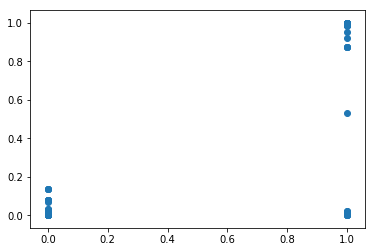

In [36]:
plt.scatter(df_val.label=='special', df_val.score_glmnet)

In [37]:
df_test.score_ViewModifier.isnull().sum()

0

In [38]:
dfpred[dfpred["score_image"].isnull()].head()
# .reset_index()["index"].to_csv("../tables/spotmag_predictions/missing_imgs.csv")

,id,score_gbm,score_xgb,score_rpart,score_gbmt,ViewModifier,set,label,view,score_image,...,score_image*glmnet,score_image*gbmt,score_max_image_wire,score_max_image_wire_max,score_max_image_wire+gbmt,score_max_image_wire_max+gbmt,score_max_wire_image+gbmt,score_max_wire_max_image+gbmt,score_max(image;wire_max;gbmt),score_ViewModifier
0,1000047423_1.2.840.113654.2.70.1.2089724714216...,0.001434,0.002226,0.006882,0.045568,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.022784,0.022784,0.0,0.0,0.045568,0.0
1,1000047423_1.2.840.113654.2.70.1.2089724714216...,0.001434,0.002226,0.006882,0.045573,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.022786,0.022786,0.0,0.0,0.045573,0.0
2,1000047423_1.2.840.113654.2.70.1.2089724714216...,0.001434,0.001841,0.006882,0.045569,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.022784,0.022784,0.0,0.0,0.045569,0.0
3,1000047423_1.2.840.113654.2.70.1.2089724714216...,0.001434,0.001841,0.006882,0.045568,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.022784,0.022784,0.0,0.0,0.045568,0.0
4,1000047594_1.2.840.113654.2.70.1.1921731705635...,0.001402,0.003848,0.006882,0.045498,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.022749,0.022749,0.0,0.0,0.045498,0.0


In [39]:
dfpred[~dfpred["score_image"].isnull()].head()

,id,score_gbm,score_xgb,score_rpart,score_gbmt,ViewModifier,set,label,view,score_image,...,score_image*glmnet,score_image*gbmt,score_max_image_wire,score_max_image_wire_max,score_max_image_wire+gbmt,score_max_image_wire_max+gbmt,score_max_wire_image+gbmt,score_max_wire_max_image+gbmt,score_max(image;wire_max;gbmt),score_ViewModifier
61,1000367304_1.2.840.113654.2.70.1.7929291008356...,0.003763,0.002105,0.006882,0.045998,NaN,val,normal,N,0.000134,...,0.000753,0.002481,0.000134,0.000134,0.023066,0.023066,0.023066,0.023066,0.045998,0.0
180,1001369263_1.2.840.113654.2.70.1.1021686361183...,0.993273,0.993830,1.000000,0.906065,magnification,train,special,M,1.000000,...,0.995404,0.951874,1.000000,1.000000,0.953032,0.953032,0.953032,0.953032,1.000000,1.0
802,1004507537_1.2.840.113654.2.70.1.1283916788292...,0.001284,0.003285,0.006882,0.045498,NaN,train,normal,N,0.000903,...,0.001955,0.006408,0.000903,0.000903,0.023200,0.023200,0.023200,0.023200,0.045498,0.0
818,1004507537_1.2.840.113654.2.70.1.2054380122193...,0.001750,0.003848,0.006882,0.049429,NaN,train,normal,N,0.000788,...,0.001826,0.006241,0.000788,0.000788,0.025109,0.025109,0.025109,0.025109,0.049429,0.0
1038,1005140751_1.2.840.113654.2.70.1.1511921198535...,0.001284,0.002206,0.006882,0.045471,NaN,val,normal,N,0.000127,...,0.000733,0.002402,0.000127,0.000127,0.022799,0.022799,0.022799,0.022799,0.045471,0.0


In [40]:
dfpred.ViewModifier.value_counts()

magnification         41039
spot compression      23194
implant displaced     15534
rolled medial           114
rolled lateral           82
axillary tail            38
tangential               38
cleavage                  7
infra-mammary fold        7
nipple in profile         3
rolled inferior           1
rolled superior           1
Name: ViewModifier, dtype: int64

In [41]:
def specificity_at_sensitivity100(fpr_, tpr_):
    tpr_max = tpr_.max() 
    if tpr_max == 1:
        return 1-fpr_[np.argmax(tpr_ == tpr_max)]
    else:
        return 0
    
def thr_at_sensitivity100(thr, tpr_):
    tpr_max = tpr_.max() 
    if tpr_max == 1:
        return thr[np.argmax(tpr_ == tpr_max)]
    else:
        return 1.0

## VALIDATION SET
in code and tables referred to as 'test'

In [42]:
dfmodels = []
THR = 0.5
optimal=False
for cc in df_test.columns:
    mdict = {}
    if not cc.startswith("score"):
        continue

    label = df_test["label"]!= 'normal'
    fpr_, tpr_, thresholds = roc_curve(label, df_test[cc], pos_label=1)
    if optimal:
        opt_thr = thresholds[np.argmax(tpr_ - fpr_)]
    else:
        opt_thr=THR
        
    print(cc, label.sum(), opt_thr)
#     pr, rec, thresholds_ = precision_recall_curve(df_test["label"]!= 'normal', df_test[cc], pos_label=1)
    for ff in [f1_score, accuracy_score, precision_score, recall_score, average_precision_score]:
        mm = ff(label, df_test[cc]>=opt_thr)
        mdict[ff.__name__] = mm
    auc_ = auc(fpr_, tpr_)
    mdict["auROC"] = auc_
    mdict["specificity_at_sensitivity100"] = specificity_at_sensitivity100(fpr_, tpr_)
#     auc_ = auc(pr, rec, )
#     mdict["auPRC"] = auc_
    mdict["model"] = cc
    mdict["thr"] = opt_thr
#     print(cc, auc_)
    dfmodels.append(mdict)
#     break

for cc in ["score_wire", 'score_wire_max']:
    mdict = {}
    if cc in ["score_wire", 'score_wire_max']:
        label = df_test["view"]== 'W'
    else:
        label = df_test["label"]!= 'normal'
    print(cc, label.sum())
    fpr_, tpr_, thresholds = roc_curve(label, df_test[cc], pos_label=1)
#     pr, rec, thresholds_ = precision_recall_curve(df_test["label"]!= 'normal', df_test[cc], pos_label=1)
    if optimal:
        opt_thr = thresholds[np.argmax(tpr_ - fpr_)]
    else:
        opt_thr=THR
    for ff in [f1_score, accuracy_score, precision_score, recall_score, average_precision_score]:
        mm = ff(label, df_test[cc]>=opt_thr)
        mdict[ff.__name__] = mm
    auc_ = auc(fpr_, tpr_)
    mdict["auROC"] = auc_
    mdict["specificity_at_sensitivity100"] = specificity_at_sensitivity100(fpr_, tpr_)
    mdict["thr"] = opt_thr
#     auc_ = auc(pr, rec, )
#     mdict["auPRC"] = auc_
    cc_ =  cc + " (vs other views)"
    mdict["model"] = cc_
#     print(cc, auc_)
    dfmodels.append(mdict)
    
dfmodels = pd.DataFrame(dfmodels)[["model", "auROC","average_precision_score", "f1_score", 
                                   "precision_score", "recall_score", "accuracy_score", "thr", "specificity_at_sensitivity100" ]]

dfmodels["model"] = dfmodels["model"].str.replace('score_','')
dfmodels.columns = [cc.replace('_score','') for cc in dfmodels.columns]
dfmodels.rename(columns={"average_precision":"auPRC", "f1":"F1"}, inplace=True)

dfmodels = dfmodels.set_index('model').round(4)*100
dfmodels = dfmodels.loc[[ 'ViewModifier', 'rpart', 'gbm', 'glmnet','xgb', 'gbmt', 
                         'image',
                         'image_max',
#                           'wire', 'wire_max', 
                         'wire (vs other views)',
                         'wire_max (vs other views)',
#                          'max_image_wire',
#                          "image+glmnet" ,
#                         'max_image_wire+gbmt',
                         'max_image_wire_max',
                         'image+gbmt',
#                          'max(image;gbmt)',
#                          'max_image_wire_max+gbmt',
                         'max_wire_max_image+gbmt',
#                          'max(image;wire_max;gbmt)',
#                          'max_wire_image+gbmt'
# #                          "image*glmnet" ,'img*gbmt'
                        ]]
dfmodels.rename(index={"max_image_wire":"max(image, wire)",
                       'image':'avg(image)',
                       'image_max':'max(image)',
                       'image+gbmt': 'avg(image)+gbmt',
                       'wire_max':'max(wire)', 
                       'wire (vs other views)':'avg(wire) (vs other views)',
                       'wire_max (vs other views)':'max(wire) (vs other views)',
                       'max_wire_image+gbmt': 'max(wire, image+gbmt)',
#                        "max_image_wire+gbmt":"max(image, wire) + gbmt",
                         'max_image_wire_max': "max(avg(image), max(wire))",
#                          'max_image_wire_max+gbmt':'max(image, max(wire))+gbmt',
                       'max(image;gbmt)':'max(image, gbmt)',
                       'max(image;wire_max;gbmt)':'max(image, wire_max, gbmt)',
                         'max_wire_max_image+gbmt':'max(max(wire), avg(image)+gbmt)',
                      }, inplace=True)
df_performance_test = dfmodels

score_gbm 114 0.5
score_xgb 114 0.5
score_rpart 114 0.5
score_gbmt 114 0.5
score_image 114 0.5
score_image_max 114 0.5
score_glmnet 114 0.5
score_wire 114 0.5
score_wire_max 114 0.5
score_image+glmnet 114 0.5
score_image+gbmt 114 0.5
score_max(image;gbmt) 114 0.5
score_image*glmnet 114 0.5
score_image*gbmt 114 0.5
score_max_image_wire 114 0.5
score_max_image_wire_max 114 0.5
score_max_image_wire+gbmt 114 0.5
score_max_image_wire_max+gbmt 114 0.5
score_max_wire_image+gbmt 114 0.5
score_max_wire_max_image+gbmt 114 0.5
score_max(image;wire_max;gbmt) 114 0.5
score_ViewModifier 114 0.5
score_wire 11
score_wire_max 11


Text(0,0.5,'score_wire_max')

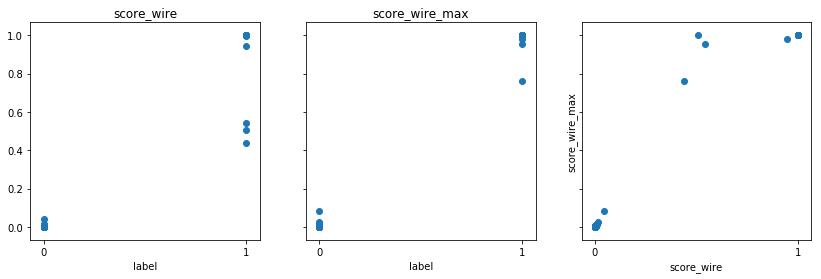

In [43]:
label = df_test["view"]== 'W'

# fpr_, tpr_, thresholds = roc_curve(label, df_test[cc], pos_label=1)
# plt.plot(fpr_, tpr_)
fig, axs = plt.subplots(1,3, sharex=True, sharey=True, figsize=(14,4))

cc = 'score_wire'
axs[0].scatter(label, df_test[cc])
axs[0].set_title(cc)
axs[0].set_xlabel('label')
axs[0].set_xticks([0,1])
cc = 'score_wire_max'
axs[1].scatter(label, df_test[cc])
axs[1].set_title(cc)
axs[1].set_xlabel('label')
axs[1].set_xticks([0,1])

axs[2].scatter(df_test['score_wire'], df_test['score_wire_max'])
axs[2].set_xlabel('score_wire')
axs[2].set_ylabel('score_wire_max')

In [44]:
df_performance_test

,auROC,auPRC,F1,precision,recall,accuracy,thr,specificity_at_sensitivity100
model,,,,,,,,
ViewModifier,92.23,75.03,85.47,83.33,87.72,95.32,50.0,0.00
rpart,94.30,90.39,93.95,100.00,88.60,98.21,50.0,0.00
gbm,94.82,90.39,93.95,100.00,88.60,98.21,50.0,1.31
glmnet,95.88,90.39,93.95,100.00,88.60,98.21,50.0,0.33
xgb,96.30,90.39,93.95,100.00,88.60,98.21,50.0,11.11
gbmt,96.59,90.39,93.95,100.00,88.60,98.21,50.0,5.56
avg(image),99.60,93.10,95.96,98.17,93.86,98.76,50.0,79.41
max(image),99.52,92.26,95.54,97.27,93.86,98.62,50.0,75.33
avg(wire) (vs other views),100.00,91.05,95.24,100.00,90.91,99.86,50.0,100.00


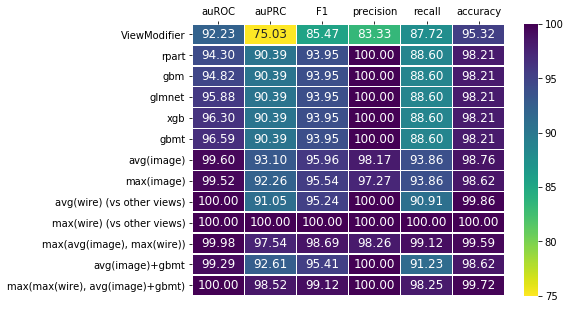

In [45]:
fig, ax = plt.subplots(1, figsize=(7,5))
sns.heatmap(df_performance_test.drop(['thr', 'specificity_at_sensitivity100'], axis=1), annot=True, fmt=".2f", 
             annot_kws={"size": 12, #'weight':'bold'
                       },
            linewidths=.5, cmap="viridis_r", vmin=75, vmax=100, ax=ax)
ax.xaxis.tick_top()
ax.set_ylabel('')
locs, labels = plt.yticks()
plt.setp(labels, rotation=0)
pass

In [46]:
os.makedirs('img', exist_ok=True)

## Confusion matrix on validation set

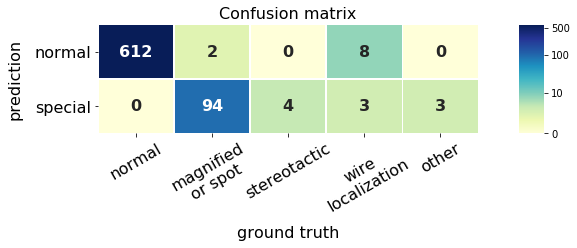

In [47]:
cc = 'score_image+gbmt'
optimal = False
mask = dfpred["set"]=="test"
label = df_test.label != 'normal'
fpr_, tpr_, thresholds = roc_curve(label, df_test[cc], pos_label=1)
if optimal:
    opt_thr = thresholds[np.argmax(tpr_ - fpr_)]
else:
    opt_thr=THR

fig = plt.figure(figsize=(8, 2))

gs = gridspec.GridSpec(1, 2, width_ratios=[15, 1],) 
axs = [plt.subplot(gs_) for gs_ in gs]

conf_view = pd.crosstab(dfpred[cc][mask]>=opt_thr, dfpred[mask]["view"]).loc[:,["N", "M", "T","W", "X"]]
conf_view.index = conf_view.index.map(lambda x: {True:"special", False:"normal"}[x])
colmap = {"N":"normal", "M": "magnified\nor spot",
          "T":"stereotactic", "W":"wire\nlocalization", "X":"other"}
conf_view.columns = conf_view.columns.map(lambda x: colmap[x])

formatter = LogFormatter(10, labelOnlyBase=False) 
hm = sns.heatmap((conf_view+1), #.applymap(lambda x: np.log10(1+x)),
            annot=conf_view,
            annot_kws={"size": 16, 'weight':'bold'},
            fmt="d", linewidths=.5, cmap="YlGnBu", 
            vmin=1, vmax=600,
            ax=axs[0],
            cbar_kws=dict(format = formatter, ticks=1+np.r_[0,10,100, 500],
                            ),
            cbar_ax=axs[1],
           norm=LogNorm())

locs, labels = plt.yticks()
plt.setp(labels, rotation=0)

axs[1].set_yticklabels([0,10,100, 500])
axs[0].axes.yaxis.set_tick_params(rotation=0, labelsize=16)
axs[0].axes.xaxis.set_tick_params(rotation=30, labelsize=16)

# axs[0].axes.yaxis.set_label("prediction", size=16)
axs[0].set_ylabel("prediction", fontsize=16, labelpad=12)
axs[0].set_xlabel("ground truth", fontsize=16, labelpad=12)
axs[0].set_title("Confusion matrix", fontsize=16)
# fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# plt.subplots_adjust(top=0.85, bottoxm=-0.0)
plt.savefig(f"./img/confmatr_test_0.5-{tag}.eps", bbox_inches='tight', pad_inches=0)
plt.savefig(f"./img/confmatr_test_0.5-{tag}.tiff", bbox_inches='tight', pad_inches=0, dpi=300)

## HOLDOUT SET
in code and tables referred to as 'val'

In [48]:
df_val.loc[:,"score_wire"] = df_val["score_wire"].fillna(0)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Confusion matrix on the holdout set

In [49]:
pd.crosstab(df_val['score_max_wire_image+gbmt']>0.5, df_val.view)[['N','M','T','W','X']]

view,N,M,T,W,X
score_max_wire_image+gbmt,,,,,
False,602,0,1,1,1
True,2,96,3,8,1


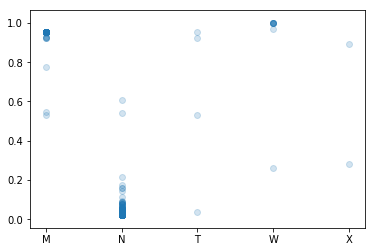

In [50]:
plt.scatter(df_val.view, df_val['score_max_wire_image+gbmt'], alpha=0.2)

In [51]:
# def specificity_at_sensitivity100(fpr_, tpr_):
#     tpr_max = tpr_.max() 
#     if tpr_max == 1:
#         return 1-fpr_[np.argmax(tpr_ == tpr_max)]
#     else:
#         return 0

In [52]:
modeldict = {"max_image_wire":"max(image, wire)",
           'max_wire_image+gbmt': 'max(wire, image+gbmt)',
           "max_image_wire+gbmt":"max(image,wire) + gbmt"}

In [53]:
dfmodels = []
THR = 0.5
optimal=False

for cc in df_val.columns:
    mdict = {}
    if not cc.startswith("score"):
        continue

    label = df_val["label"]!= 'normal'
    fpr_, tpr_, thresholds = roc_curve(label, df_val[cc], pos_label=1)
    cc_out = cc.replace('score_','')
    cc_out = modeldict.get(cc_out, cc_out)
    if optimal:
        try:
            opt_thr = df_performance_test.loc[cc_out, "thr"] / 100
        except KeyError as ee:
            print("no key '%s' found" % cc_out)
    else:
        opt_thr = THR
    print(cc, cc_out, label.sum(), opt_thr)
#     pr, rec, thresholds_ = precision_recall_curve(df_test["label"]!= 'normal', df_test[cc], pos_label=1)
    mdict["specificity_at_sensitivity100"] = specificity_at_sensitivity100(fpr_, tpr_)
    for ff in [f1_score, accuracy_score, precision_score, recall_score, average_precision_score]:
        mm = ff(label, df_val[cc]>THR)
        mdict[ff.__name__] = mm
    auc_ = auc(fpr_, tpr_)
    mdict["auROC"] = auc_
#     auc_ = auc(pr, rec, )
#     mdict["auPRC"] = auc_
    mdict["thr"] = opt_thr
    mdict["model"] = cc
#     print(cc, auc_)
    dfmodels.append(mdict)
#     break

for cc in ["score_wire"]:
    cc_out = cc.replace('score_','')
    cc_out = modeldict.get(cc_out, cc_out)
    mdict = {}
    if not cc.startswith("score"):
        continue

    if cc=="score_wire": 
        label = df_val["view"]== 'W'
    else:
        label = df_val["label"]!= 'normal'
    
    fpr_, tpr_, thresholds = roc_curve(label, df_val[cc], pos_label=1)
    if optimal:
        try:
            opt_thr = df_performance_test.loc[cc_out, "thr"] / 100.0
        except KeyError as ee:
            print("no key '%s' found" % cc_out)
#         opt_thr = thresholds[np.argmax(tpr_ - fpr_)]
    else:
        opt_thr = THR
    print(cc, cc_out, label.sum(), opt_thr)
#     pr, rec, thresholds_ = precision_recall_curve(df_test["label"]!= 'normal', df_test[cc], pos_label=1)
    for ff in [f1_score, accuracy_score, precision_score, recall_score, average_precision_score]:
        mm = ff(label, df_val[cc]>opt_thr)
        mdict[ff.__name__] = mm
    auc_ = auc(fpr_, tpr_)
    mdict["auROC"] = auc_
#     auc_ = auc(pr, rec, )
#     mdict["auPRC"] = auc_
    mdict["thr"] = opt_thr
    cc = "score_wire (vs other views)"
    mdict["model"] = cc
#     print(cc, auc_)
    dfmodels.append(mdict)
    
dfmodels = pd.DataFrame(dfmodels)[["model", "auROC","average_precision_score", "f1_score", 
                                   "precision_score", "recall_score", "accuracy_score", 'thr',
                                   'specificity_at_sensitivity100']]

dfmodels["model"] = dfmodels["model"].str.replace('score_','')
dfmodels.columns = [cc.replace('_score','') for cc in dfmodels.columns]
dfmodels.rename(columns={"average_precision":"auPRC", "f1":"F1"}, inplace=True)

dfmodels = dfmodels.set_index('model').round(4)*100
dfmodels = dfmodels.loc[[ 'ViewModifier', 'rpart', 'gbm', 'glmnet','xgb', 'gbmt', 
                         'image',
                         'image_max',
#                           'wire', 'wire_max', 
                         'wire (vs other views)',
                         'wire_max (vs other views)',
#                          'max_image_wire',
#                          "image+glmnet" ,
#                         'max_image_wire+gbmt',
                         'max_image_wire_max',
                         'image+gbmt',
#                          'max_image_wire_max+gbmt',
                         'max_wire_max_image+gbmt',
#                          'max_wire_image+gbmt'
# #                          "image*glmnet" ,'img*gbmt'
                        ]]
dfmodels.rename(index={"max_image_wire":"max(image, wire)",
                       'image':'avg(image)',
                       'image_max':'max(image)',
                       'image+gbmt': 'avg(image)+gbmt',
                       'wire_max':'max(wire)', 
                       'wire (vs other views)':'avg(wire) (vs other views)',
                       'wire_max (vs other views)':'max(wire) (vs other views)',
                       'max_wire_image+gbmt': 'max(wire, image+gbmt)',
#                        "max_image_wire+gbmt":"max(image, wire) + gbmt",
                         'max_image_wire_max': "max(avg(image), max(wire))",
#                          'max_image_wire_max+gbmt':'max(image, max(wire))+gbmt',
                         'max_wire_max_image+gbmt':'max(max(wire), avg(image)+gbmt)',
                      }, inplace=True)
df_performance_val = dfmodels.copy()

score_gbm gbm 111 0.5
score_xgb xgb 111 0.5
score_rpart rpart 111 0.5
score_gbmt gbmt 111 0.5
score_image image 111 0.5
score_image_max image_max 111 0.5
score_glmnet glmnet 111 0.5
score_wire wire 111 0.5
score_wire_max wire_max 111 0.5
score_image+glmnet image+glmnet 111 0.5
score_image+gbmt image+gbmt 111 0.5
score_max(image;gbmt) max(image;gbmt) 111 0.5
score_image*glmnet image*glmnet 111 0.5
score_image*gbmt image*gbmt 111 0.5
score_max_image_wire max(image, wire) 111 0.5
score_max_image_wire_max max_image_wire_max 111 0.5
score_max_image_wire+gbmt max(image,wire) + gbmt 111 0.5
score_max_image_wire_max+gbmt max_image_wire_max+gbmt 111 0.5
score_max_wire_image+gbmt max(wire, image+gbmt) 111 0.5
score_max_wire_max_image+gbmt max_wire_max_image+gbmt 111 0.5
score_max(image;wire_max;gbmt) max(image;wire_max;gbmt) 111 0.5
score_ViewModifier ViewModifier 111 0.5
score_wire wire 9 0.5


In [54]:
df_val.view.value_counts()

N    604
M     96
W      9
T      4
X      2
Name: view, dtype: int64

In [55]:
df_val.shape

(715, 28)

## Error analysis on the holdout set

In [56]:
df_val[(df_val['score_max_wire_max_image+gbmt']>0.5) &
            (df_val.label == 'normal')].index

Int64Index([416533, 737995], dtype='int64')

In [57]:
df_val[((df_val['score_max_wire_max_image+gbmt']<=0.5) &
            (df_val.label != 'normal'))].index

Int64Index([403353, 605642, 703377], dtype='int64')

In [58]:
best_model_name = df_performance_test['auROC'].drop(['avg(wire) (vs other views)',
                                                     'max(wire) (vs other views)']).argmax()
# best_model_name = 'max(max(wire),image+gbmt)'
best_model_name

'max(max(wire), avg(image)+gbmt)'

## Performance table for the validation set + best model for the holdout set

In [59]:
ds_best_performance_val = df_performance_val.loc[best_model_name]
ds_best_performance_val.name = "[holdout] " + ds_best_performance_val.name
df_performance_test.append(ds_best_performance_val)

,auROC,auPRC,F1,precision,recall,accuracy,thr,specificity_at_sensitivity100
model,,,,,,,,
ViewModifier,92.23,75.03,85.47,83.33,87.72,95.32,50.0,0.00
rpart,94.30,90.39,93.95,100.00,88.60,98.21,50.0,0.00
gbm,94.82,90.39,93.95,100.00,88.60,98.21,50.0,1.31
glmnet,95.88,90.39,93.95,100.00,88.60,98.21,50.0,0.33
xgb,96.30,90.39,93.95,100.00,88.60,98.21,50.0,11.11
gbmt,96.59,90.39,93.95,100.00,88.60,98.21,50.0,5.56
avg(image),99.60,93.10,95.96,98.17,93.86,98.76,50.0,79.41
max(image),99.52,92.26,95.54,97.27,93.86,98.62,50.0,75.33
avg(wire) (vs other views),100.00,91.05,95.24,100.00,90.91,99.86,50.0,100.00


In [60]:
# from matplotlib.pyplot import cm
ds_best_performance_val

auROC                            99.73
auPRC                            95.95
F1                               97.74
precision                        98.18
recall                           97.30
accuracy                         99.30
thr                              50.00
specificity_at_sensitivity100    88.25
Name: [holdout] max(max(wire), avg(image)+gbmt), dtype: float64

In [61]:
df_performance_test.index

Index(['ViewModifier', 'rpart', 'gbm', 'glmnet', 'xgb', 'gbmt', 'avg(image)',
       'max(image)', 'avg(wire) (vs other views)',
       'max(wire) (vs other views)', 'max(avg(image), max(wire))',
       'avg(image)+gbmt', 'max(max(wire), avg(image)+gbmt)'],
      dtype='object', name='model')

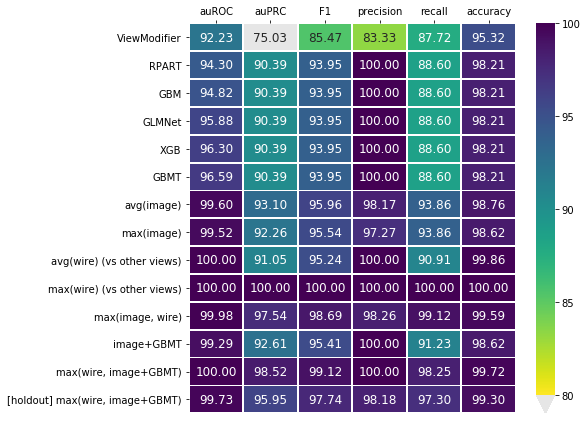

In [62]:
fig, ax = plt.subplots(1, figsize=(8.5,6))
# cmap = haline_r#
cmap = plt.cm.get_cmap('viridis_r')
cmap.set_under([0.9]*3)

hm = sns.heatmap(df_performance_test.append(ds_best_performance_val).drop(
                ['thr', 'specificity_at_sensitivity100'], axis=1).rename(
#                 index = {'rpart':'RPART', 'gbm':'GBM', 'glmnet':'GLMNet', 'xgb':'XGB', 'gbmt':'GBMT',
#                         'avg(image)+gbmt':'avg(image)+GBMT',
#                         'max(max(wire), avg(image)+gbmt)':'max(max(wire), avg(image)+GBMT)',
#                         '[holdout] max(max(wire), avg(image)+gbmt)':'[holdout] max(max(wire), avg(image)+GBMT)',
#                     } 

                index = {'rpart':'RPART', 'gbm':'GBM', 'glmnet':'GLMNet', 'xgb':'XGB', 'gbmt':'GBMT',
                        'avg(image)+gbmt':'image+GBMT',
                         'max(avg(image), max(wire))':'max(image, wire)',
                        'max(max(wire), avg(image)+gbmt)':'max(wire, image+GBMT)',
                        'max(wire, image+gbmt)':'max(wire, image+GBMT)',
                        '[holdout] max(max(wire), avg(image)+gbmt)':'[holdout] max(wire, image+GBMT)',
                    } ),
                 annot=True, fmt=".2f", 
             annot_kws={"size": 12, #'weight':'bold'
                       },
            cbar_kws={'extend':'min', 'ticks': np.arange(80,100+1, 5)},
            linewidths=.75, cmap=cmap, vmin=80, vmax=100, ax=ax)
ax.xaxis.tick_top()
ax.set_ylabel('')
locs, labels = plt.yticks()
plt.setp(labels, rotation=0)
plt.tight_layout()
plt.savefig(f"./img/all_model_performance-{tag}.eps",)
plt.savefig(f"./img/all_model_performance-{tag}.tiff", dpi=300)
pass

In [63]:
ds_best_performance_val

auROC                            99.73
auPRC                            95.95
F1                               97.74
precision                        98.18
recall                           97.30
accuracy                         99.30
thr                              50.00
specificity_at_sensitivity100    88.25
Name: [holdout] max(max(wire), avg(image)+gbmt), dtype: float64

## Calibrate threshold for the whole dataset

In [64]:
# df_val["score_max_wire_img+gbmt"]
# df_val.label
cc = "score_image+gbmt"
df_thr_calibration = {}

label = df_val["label"]!= 'normal'
# _,_, thresholds = roc_curve(label, df_val[cc])

thresholds = df_val[cc].unique()
thresholds = thresholds[(thresholds<=0.5) & (thresholds>=1e-3)]
thresholds = sorted([0.01] + thresholds.tolist() + [0.5])
# thresholds = thresholds[::-1]
# thresholds = thresholds[thresholds<=0.5]

# for thr in [0.01, 0.02, 0.03, 0.04] + np.arange(0.05, 0.55, 0.05).tolist():
for thr in [0.01] + thresholds:# np.arange(0.01, 0.51, 0.01).tolist():
    mdict = {}

    for ff in [f1_score, accuracy_score, precision_score, recall_score, average_precision_score]:
        mm = ff(label, df_val[cc]>thr)
        mdict[ff.__name__] = mm
    df_thr_calibration[thr] = pd.Series(mdict)
    del mdict
df_thr_calibration = pd.DataFrame(df_thr_calibration).T
df_thr_calibration.to_csv("threshold_calibration_{}.csv".format(cc))
df_thr_calibration.head()

,accuracy_score,average_precision_score,f1_score,precision_score,recall_score
0.010000,0.155245,0.155245,0.268765,0.155245,1.0
0.020697,0.156643,0.155462,0.269091,0.155462,1.0
0.020780,0.158042,0.155680,0.269417,0.155680,1.0
0.020882,0.159441,0.155899,0.269745,0.155899,1.0
0.022620,0.160839,0.156118,0.270073,0.156118,1.0


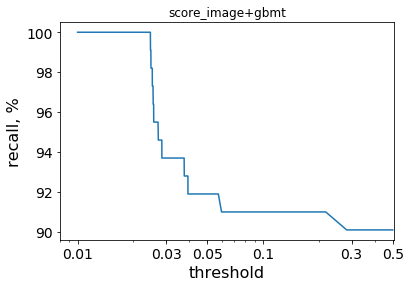

In [65]:
xticks = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5]
fig, ax = plt.subplots(1)
(100*df_thr_calibration.recall_score).plot(ax=ax)
plt.xscale('log')

ax.set_xticks(xticks)
ax.set_xlim([0.008, xticks[-1] + xticks[0]])
# ax.set_yticks(np.arange(97.0, 100.5, 1.0))

ax.axes.yaxis.set_tick_params(rotation=0, labelsize=14)
ax.set_xticklabels(xticks, fontdict={"fontsize": 14})

plt.xlabel("threshold", fontdict={"fontsize": 16})
plt.ylabel("recall, %" , fontdict={"fontsize": 16})
plt.title(cc)

pass

In [66]:
# df_val["score_max_wire_img+gbmt"]
# df_val.label
cc = "score_wire"
df_thr_calibration = {}
# for thr in [0.01, 0.02, 0.03, 0.04] + np.arange(0.05, 0.55, 0.05).tolist():

label = df_val["view"]== 'W'
# _,_, thresholds = roc_curve(label, df_val[cc])
# thresholds = thresholds[::-1]
thresholds = df_val[cc].unique()
thresholds = thresholds[(thresholds<=0.5) & (thresholds>=1e-3)]
thresholds = sorted([0.01] + thresholds.tolist() + [0.5])
# thresholds.remove(0.0)

for thr in thresholds:# np.arange(0.01, 0.51, 0.01).tolist():
    mdict = {}
    for ff in [f1_score, accuracy_score, precision_score, recall_score, average_precision_score]:
        mm = ff(label, df_val[cc]>thr)
        mdict[ff.__name__] = mm
    df_thr_calibration[thr] = pd.Series(mdict)
    del mdict
df_thr_calibration = pd.DataFrame(df_thr_calibration).T
df_thr_calibration.to_csv(f"threshold_calibration_{cc}-{tag}.csv")
df_thr_calibration.head()

,accuracy_score,average_precision_score,f1_score,precision_score,recall_score
0.001140,0.981818,0.409091,0.580645,0.409091,1.0
0.001209,0.983217,0.428571,0.600000,0.428571,1.0
0.001519,0.984615,0.450000,0.620690,0.450000,1.0
0.001624,0.986014,0.473684,0.642857,0.473684,1.0
0.001643,0.987413,0.500000,0.666667,0.500000,1.0


In [67]:
thr_wire = df_thr_calibration[df_thr_calibration.recall_score==1.0].f1_score.argmax()
thr_wire

0.006923830000000075

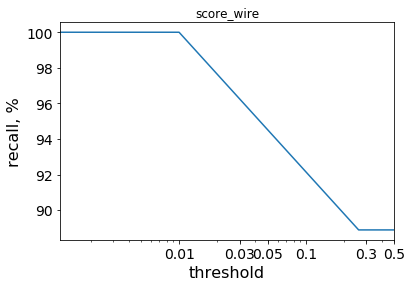

In [68]:
xticks = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5]
fig, ax = plt.subplots(1)
(100*df_thr_calibration.recall_score).plot(ax=ax)
plt.xscale('log')

ax.set_xticks(xticks)
# ax.set_xlim([0.008, xticks[-1] + xticks[0]])
# ax.set_yticks(np.arange(97.0, 100.5, 1.0))

ax.axes.yaxis.set_tick_params(rotation=0, labelsize=14)
ax.set_xticklabels(xticks, fontdict={"fontsize": 14})

plt.xlabel("threshold", fontdict={"fontsize": 16})
plt.ylabel("recall, %" , fontdict={"fontsize": 16})
plt.title(cc)


pass

In [69]:
(df_val['score_wire']>thr_wire).mean()

0.013986013986013986

In [70]:
(df_val[cc]>0.5).mean()
# thresholds

0.012587412587412588

In [71]:
# df_val["score_max_wire_img+gbmt"]
# df_val.label
cc = "score_image+gbmt"
df_thr_calibration = {}
# for thr in [0.01, 0.02, 0.03, 0.04] + np.arange(0.05, 0.55, 0.05).tolist():

label = df_val["label"]!= 'normal'
# _,_, thresholds = roc_curve(label, df_val[cc])
thresholds = df_val[cc].unique()
thresholds = thresholds[(thresholds<=0.5) & (thresholds>=1e-3)]
thresholds = sorted([0.01] + thresholds.tolist() + [0.5])

for thr in thresholds:# np.arange(0.01, 0.51, 0.01).tolist():
    mdict = {}
    for ff in [f1_score, accuracy_score, precision_score, recall_score, average_precision_score]:
        mm = ff(label, (df_val[cc]>thr) | (df_val['score_wire']>thr_wire))
        mdict[ff.__name__] = mm
    df_thr_calibration[thr] = pd.Series(mdict)
    del mdict
df_thr_calibration = pd.DataFrame(df_thr_calibration).T
outfn = f"threshold_calibration_{cc}-fixed_wire-{tag}.csv"
print(outfn)
df_thr_calibration.to_csv(outfn)
print(df_thr_calibration.recall_score.max())
df_thr_calibration.head()

threshold_calibration_score_image+gbmt-fixed_wire-e5ce2d69b035975cb5336cec0da9a32a.csv
1.0


,accuracy_score,average_precision_score,f1_score,precision_score,recall_score
0.010000,0.155245,0.155245,0.268765,0.155245,1.0
0.020697,0.156643,0.155462,0.269091,0.155462,1.0
0.020780,0.158042,0.155680,0.269417,0.155680,1.0
0.020882,0.159441,0.155899,0.269745,0.155899,1.0
0.022620,0.160839,0.156118,0.270073,0.156118,1.0


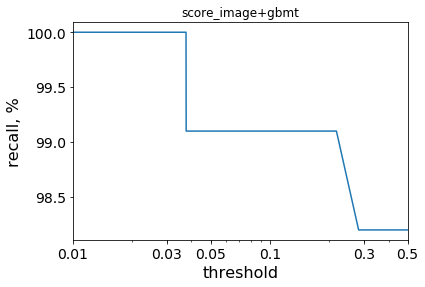

In [72]:
xticks = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5]
fig, ax = plt.subplots(1)
(100*df_thr_calibration.recall_score).plot(ax=ax)
plt.xscale('log')

ax.set_xticks(xticks)
# ax.set_xlim([0.008, xticks[-1] + xticks[0]])
# ax.set_yticks(np.arange(97.0, 100.5, 1.0))

ax.axes.yaxis.set_tick_params(rotation=0, labelsize=14)
ax.set_xticklabels(xticks, fontdict={"fontsize": 14})

plt.xlabel("threshold", fontdict={"fontsize": 16})
plt.ylabel("recall, %" , fontdict={"fontsize": 16})
plt.title(cc)
pass

In [73]:
# df_val["score_max_wire_img+gbmt"]
# df_val.label
cc = "score_max_wire_image+gbmt"
df_thr_calibration = {}
# for thr in [0.01, 0.02, 0.03, 0.04] + np.arange(0.05, 0.55, 0.05).tolist():
label = df_val["label"]!= 'normal'
thresholds = df_val[cc].unique()
thresholds = thresholds[(thresholds<=0.5) & (thresholds>=1e-3)]
thresholds = sorted([0.01] + thresholds.tolist() + [0.5])

for thr in thresholds:
    mdict = {}
    for ff in [f1_score, accuracy_score, precision_score, recall_score, average_precision_score]:
        mm = ff(label, df_val[cc]>thr)
        mdict[ff.__name__] = mm
    df_thr_calibration[thr] = pd.Series(mdict)
    del mdict
df_thr_calibration = pd.DataFrame(df_thr_calibration).T
df_thr_calibration.head()

,accuracy_score,average_precision_score,f1_score,precision_score,recall_score
0.010000,0.155245,0.155245,0.268765,0.155245,1.0
0.020697,0.156643,0.155462,0.269091,0.155462,1.0
0.020780,0.158042,0.155680,0.269417,0.155680,1.0
0.020882,0.159441,0.155899,0.269745,0.155899,1.0
0.022620,0.160839,0.156118,0.270073,0.156118,1.0


In [74]:
df_thr_calibration.loc[0.1:0.2]

,accuracy_score,average_precision_score,f1_score,precision_score,recall_score
0.111608,0.988811,0.933100,0.964912,0.940171,0.990991
0.145841,0.990210,0.941131,0.969163,0.948276,0.990991
0.157418,0.991608,0.949303,0.973451,0.956522,0.990991
0.160415,0.993007,0.957618,0.977778,0.964912,0.990991
0.174540,0.994406,0.966080,0.982143,0.973451,0.990991


In [75]:
df_thr_calibration.to_csv(f"threshold_calibration_final_model-{tag}.csv")

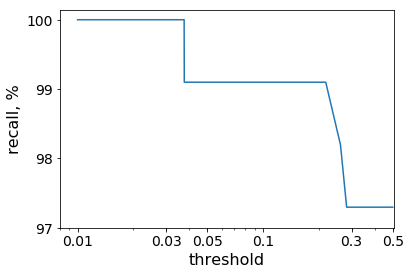

In [76]:
xticks = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5]
fig, ax = plt.subplots(1)
(100*df_thr_calibration.recall_score).plot(ax=ax)
plt.xscale('log')

ax.set_xticks(xticks)
ax.set_xlim([0.008, xticks[-1] + xticks[0]])
ax.set_yticks(np.arange(97.0, 100.5, 1.0))

ax.axes.yaxis.set_tick_params(rotation=0, labelsize=14)
ax.set_xticklabels(xticks, fontdict={"fontsize": 14})

plt.xlabel("threshold", fontdict={"fontsize": 16})
plt.ylabel("recall, %" , fontdict={"fontsize": 16})

pass